In [1]:
import pandas as pd

In [2]:
interim_path = "../data/interim/"

cpaths = [interim_path + "charts/bb_hot_100_" + str(x) + ".csv" for x in range(1960,2021)]
all_data = []
for path in cpaths:
    data = pd.read_csv(path)
    for index, row in data.iterrows():
        all_data.append({
            "date" : row["date"],
            "rank" : row["rank"],
            "artist" : row["artist"],
            "song" : row["song"],
            "lyricId" : row["lyricId"]
        })
HOT_CHART_DATA = pd.DataFrame(all_data)

lpaths = [interim_path + "lyrics-meta/lyrics_bb_hot_100_" + str(x) + ".csv" for x in range(1960,2021)]
all_data = []
for path in lpaths:
    data = pd.read_csv(path)
    for index, row in data.iterrows():
        all_data.append({
            "sentiment_comp" : row["sentiment_comp"],
            "sentiment_pos" : row["sentiment_pos"],
            "sentiment_neg" : row["sentiment_neg"],
            "sentiment_neu" : row["sentiment_neu"],
            "f_k_grade" : row["f_k_grade"],
            "flesch_index" : row["flesch_index"],
            "fog_index" : row["fog_index"],
            "difficult_words" : row["difficult_words"],
            "num_syllables" : row["num_syllables"],
            "num_words" : row["num_words"],
            "num_lines" : row["num_lines"],
            "num_dup" : row["num_dup"],            
            "artist" : row["artist"],
            "song" : row["song"],
            "lyricId" : row["lyricId"]
        })
LYRICS_META_DATA = pd.DataFrame(all_data)

apaths = [interim_path + "audio-feat/afeat_bb_hot_100_" + str(x) + ".csv" for x in range(1960,2021)]
all_data = []
for path in apaths:
    data = pd.read_csv(path)
    for index, row in data.iterrows():
        all_data.append({
            "artist" : row["artist"],
            "song" : row["song"],
            "lyricId" : row["lyricId"],
            "danceability": row["danceability"],
            "energy": row["energy"],
            "key": row["key"],
            "loudness": row["loudness"],
            "mode": row["mode"],
            "speechiness": row["speechiness"],
            "acousticness": row["acousticness"],
            "instrumentalness": row["instrumentalness"],
            "liveness": row["liveness"],
            "valence": row["valence"],
            "tempo": row["tempo"],
            "uri": row["uri"],
            "duration_ms": row["duration_ms"]
        })
AUDIO_FEAT_DATA = pd.DataFrame(all_data)

In [3]:
LYRICS_META_DATA["num_words"].describe()

count     26497.000000
mean       1744.336076
std        9715.872564
min           0.000000
25%         198.000000
50%         281.000000
75%         444.000000
max      148516.000000
Name: num_words, dtype: float64

In [4]:
# lets remove lyrics which do not really contain lyrics but garbage long text
# hypothesis lyrics with very high num of words and line might be garbage
# As Billboard reports, Eminem has set the Guinness World Record for Most Words in a Hit Single, with his recent song “Rap God” totaling 1,560 words
# so lyrics with more than 1500 words is doubtful but possible for tracks that are not single
prob_bogus = LYRICS_META_DATA[LYRICS_META_DATA["num_words"]>1500]

In [5]:
prob_bogus.shape

(2122, 15)

In [6]:
prob_bogus.head() # on visual inspection many lyrics looks bogus

,sentiment_comp,sentiment_pos,sentiment_neg,sentiment_neu,f_k_grade,flesch_index,fog_index,difficult_words,num_syllables,num_words,num_lines,num_dup,artist,song,lyricId
2,0.9998,0.113,0.086,0.801,5.7,65.28,3.78,1402,16420,10567,1726,5,Miss Toni Fisher,The Big Hurt,3
12,1.0000,0.130,0.093,0.777,1.1,98.82,3.17,1210,21382,18102,2846,22,The Nutty Squirrels,Uh! Oh! Part 2,13
16,-0.9993,0.098,0.133,0.769,1.7,97.30,3.95,301,4145,3381,427,5,Bill Black's Combo,Smokie - Part 2,17
19,-0.9998,0.093,0.095,0.812,3.8,86.30,5.06,2096,42656,32843,3158,1149,Ernie Fields & Orch.,In The Mood,20
20,1.0000,0.122,0.097,0.782,4.4,79.36,5.39,2975,31476,23012,2594,16,The Harry Simeone Chorale,The Little Drummer Boy,21


In [7]:
okay_data = LYRICS_META_DATA[LYRICS_META_DATA["num_words"]<1500]

In [8]:
okay_data.describe()

,sentiment_comp,sentiment_pos,sentiment_neg,sentiment_neu,f_k_grade,flesch_index,fog_index,difficult_words,num_syllables,num_words,num_lines,num_dup,lyricId
count,24375.000000,24375.000000,24375.000000,24375.000000,24375.000000,24375.000000,24375.000000,24375.000000,24375.000000,24375.000000,24375.000000,24375.000000,24375.000000
mean,0.435332,0.155067,0.082377,0.762309,1.321908,98.976092,3.378967,14.551959,377.471138,316.900964,43.806523,14.334974,13750.868759
std,0.801146,0.093541,0.069255,0.100974,4.945619,15.307988,4.891617,21.764664,239.830085,188.653998,22.806378,11.373173,7567.423258
min,-0.999900,0.000000,0.000000,0.000000,-15.700000,-838.310000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,-0.383050,0.088000,0.032000,0.701000,0.300000,96.590000,2.660000,5.000000,225.000000,192.000000,28.000000,6.000000,7349.500000
50%,0.950900,0.136000,0.066000,0.771000,1.100000,99.120000,3.110000,8.000000,313.000000,266.000000,39.000000,12.000000,13964.000000
75%,0.991200,0.205000,0.115000,0.833000,1.800000,106.160000,3.650000,15.000000,453.000000,383.000000,54.000000,20.000000,20301.500000
max,1.000000,0.898000,0.710000,1.000000,357.000000,206.840000,366.560000,449.000000,2527.000000,1496.000000,292.000000,114.000000,26497.000000


In [9]:
okay_data[okay_data['flesch_index']==-838.31]

,sentiment_comp,sentiment_pos,sentiment_neg,sentiment_neu,f_k_grade,flesch_index,fog_index,difficult_words,num_syllables,num_words,num_lines,num_dup,artist,song,lyricId
23674,-0.7987,0.092,0.093,0.815,357.0,-838.31,366.56,148,1279,913,1,0,Madonna Featuring Nicki Minaj,B**** I'm Madonna,23675
25482,-0.7987,0.092,0.093,0.815,357.0,-838.31,366.56,148,1279,913,1,0,Taylor Swift Featuring Brendon Urie,ME!,25483


In [10]:
songlist = okay_data['song']

In [11]:
cnt = 0
listsng = []
for row in songlist:
    if any(not c.isalnum() and not c.isspace() for c in row):
        cnt += 1
        listsng.append(row)

In [12]:
cnt

6146

In [13]:
listsng[:5]

["It's Time To Cry",
 'Go, Jimmy, Go',
 'The Village Of St. Bernadette',
 'Scarlet Ribbons (For Her Hair)',
 'Oh! Carol']

In [14]:
okay_data[okay_data['song'].isin(listsng)]

,sentiment_comp,sentiment_pos,sentiment_neg,sentiment_neu,f_k_grade,flesch_index,fog_index,difficult_words,num_syllables,num_words,num_lines,num_dup,artist,song,lyricId
5,-0.9698,0.030,0.228,0.742,0.4,105.86,3.52,1,110,101,13,3,Paul Anka,It's Time To Cry,6
8,0.9773,0.152,0.000,0.848,0.6,105.45,3.28,7,223,196,24,5,Jimmy Clanton,"Go, Jimmy, Go",9
11,0.9692,0.189,0.000,0.811,0.9,99.23,2.40,7,148,120,20,8,Andy Williams,The Village Of St. Bernadette,12
15,0.4767,0.077,0.049,0.874,2.1,90.77,3.14,8,135,108,18,0,The Browns,Scarlet Ribbons (For Her Hair),16
24,0.9903,0.364,0.234,0.402,1.4,97.91,2.92,1,174,146,20,10,Neil Sedaka,Oh! Carol,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26457,0.9875,0.246,0.013,0.741,3.1,82.81,3.05,10,195,142,26,10,Justin Bieber,Rockin' Around The Christmas Tree,26458
26465,0.9847,0.070,0.007,0.923,1.8,96.79,3.44,9,588,493,59,10,Mariah Carey Featuring Ariana Grande & Jennife...,Oh Santa!,26466
26471,-0.9799,0.133,0.174,0.693,0.5,105.76,3.60,17,416,365,46,18,Taylor Swift Featuring HAIM,"No Body, No Crime",26472
26472,0.9313,0.098,0.074,0.828,0.7,105.15,3.50,10,457,408,48,17,Taylor Swift,'Tis The Damn Season,26473


In [15]:
okay_data[okay_data['flesch_index']<0] # most are mad data points will remove

,sentiment_comp,sentiment_pos,sentiment_neg,sentiment_neu,f_k_grade,flesch_index,fog_index,difficult_words,num_syllables,num_words,num_lines,num_dup,artist,song,lyricId
44,0.9815,0.133,0.081,0.787,41.7,-6.95,45.18,57,691,553,5,1,Rod Lauren,If I Had A Girl,45
3482,0.9348,0.046,0.028,0.926,44.6,-25.40,45.86,122,1121,785,7,0,Buck Owens and The Buckaroos,Buckaroo,3483
4134,-0.3400,0.000,0.003,0.997,270.0,-590.30,280.80,0,703,702,1,12,The Rationals,Respect,4135
5607,0.9995,0.185,0.102,0.713,51.9,-38.96,55.20,141,1942,1472,11,0,Bobby Hatfield,Only You (And You Alone),5608
7455,0.9348,0.046,0.028,0.926,44.6,-25.40,45.86,122,1121,785,7,0,Donna Fargo,The Happiest Girl In The Whole U.S.A.,7456
9236,0.6506,0.048,0.014,0.938,60.2,-55.06,64.21,10,183,158,1,0,Melissa Manchester,Just You And I,9237
10729,0.9937,0.188,0.021,0.790,52.6,-40.69,54.20,3,355,271,2,22,Village People,Go West,10730
16539,-0.9914,0.158,0.216,0.627,78.5,-178.28,66.31,49,1268,488,3,20,The Notorious B.I.G.,Juicy/Unbelievable,16540
16694,-0.9972,0.054,0.136,0.810,68.4,-76.38,72.61,61,869,716,4,0,2Pac,Dear Mama/Old School,16695
18625,-0.9914,0.158,0.216,0.627,78.5,-178.28,66.31,49,1268,488,3,20,"P. Diddy, Black Rob & Mark Curry",Bad Boy For Life,18626


In [16]:
# remove datapoint with num of words grater than 1500
mainList = LYRICS_META_DATA[LYRICS_META_DATA["num_words"]<1500]

# remove datapoints with num of words less than 10
mainList = mainList[mainList["num_words"]>10]

# remove datapoints with negative flesch index
mainList = mainList[mainList["flesch_index"]>0]

In [17]:
LYRICS_META_DATA.shape[0]-mainList.shape[0]

2168

In [18]:
mainList.describe()

,sentiment_comp,sentiment_pos,sentiment_neg,sentiment_neu,f_k_grade,flesch_index,fog_index,difficult_words,num_syllables,num_words,num_lines,num_dup,lyricId
count,24329.000000,24329.000000,24329.000000,24329.000000,24329.000000,24329.000000,24329.000000,24329.000000,24329.000000,24329.000000,24329.000000,24329.000000,24329.000000
mean,0.435739,0.155246,0.082463,0.762292,1.199642,99.299279,3.253791,14.516873,377.179416,316.792182,43.884952,14.352666,13748.588310
std,0.801400,0.093472,0.069250,0.100103,1.571781,8.651262,1.165131,21.681199,238.717795,188.060279,22.756208,11.371464,7564.562034
min,-0.999900,0.000000,0.000000,0.102000,-2.700000,4.160000,1.200000,0.000000,12.000000,11.000000,1.000000,0.000000,1.000000
25%,-0.386700,0.088000,0.032000,0.701000,0.300000,96.590000,2.660000,5.000000,225.000000,192.000000,28.000000,6.000000,7351.000000
50%,0.951100,0.136000,0.066000,0.771000,1.100000,99.120000,3.110000,8.000000,313.000000,266.000000,39.000000,12.000000,13963.000000
75%,0.991200,0.205000,0.115000,0.833000,1.800000,106.160000,3.650000,15.000000,453.000000,383.000000,54.000000,20.000000,20293.000000
max,1.000000,0.898000,0.710000,1.000000,39.500000,122.370000,43.200000,449.000000,2527.000000,1496.000000,292.000000,114.000000,26496.000000


<AxesSubplot:>

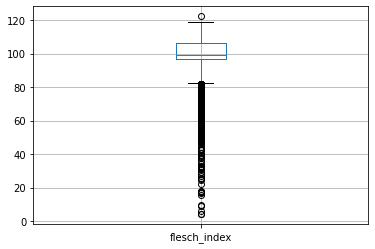

In [19]:
mainList.boxplot(column=['flesch_index'])

In [22]:
out_path = "../data/final/"
mainList.to_csv(out_path+"chart.csv", index=False)